In [3]:
#import libraries

import numpy as np
import pandas as pd
import datetime as dt
import time
import pyarrow.parquet as pq
import matplotlib.pyplot as plt


In [4]:
#read data

btc = pd.read_csv('data/btcusd.csv.zip')
eth = pd.read_csv('data/ethusd.csv.zip')
ltc = pd.read_csv('data/ltcusd.csv.zip')

In [5]:
btc.index = pd.to_datetime(btc.time.values, unit='ms')
eth.index = pd.to_datetime(eth.time.values, unit='ms')
ltc.index = pd.to_datetime(ltc.time.values, unit='ms')

In [67]:
btc['ticker'] = 'BTCUSD'
eth['ticker'] = 'ETHUSD'
ltc['ticker'] = 'LTCUSD'

In [68]:
btc.head()

,time,open,close,high,low,volume,ticker
2013-04-01 00:07:00,1364774820000,93.25,93.30,93.30,93.25,93.300000,BTCUSD
2013-04-01 00:08:00,1364774880000,100.00,100.00,100.00,100.00,93.300000,BTCUSD
2013-04-01 00:09:00,1364774940000,93.30,93.30,93.30,93.30,33.676862,BTCUSD
2013-04-01 00:11:00,1364775060000,93.35,93.47,93.47,93.35,20.000000,BTCUSD
2013-04-01 00:12:00,1364775120000,93.47,93.47,93.47,93.47,2.021627,BTCUSD


In [71]:
prices = pd.concat([btc, eth, ltc])[['close', 'volume', 'ticker']]

In [72]:
prices.head()

,close,volume,ticker
2013-04-01 00:07:00,93.30,93.300000,BTCUSD
2013-04-01 00:08:00,100.00,93.300000,BTCUSD
2013-04-01 00:09:00,93.30,33.676862,BTCUSD
2013-04-01 00:11:00,93.47,20.000000,BTCUSD
2013-04-01 00:12:00,93.47,2.021627,BTCUSD


In [75]:
#save to parquet so that we can read the data quickly (it also saves quickly)

t0=time.time()
prices.to_parquet("prices.parquet",allow_truncated_timestamps=True, use_deprecated_int96_timestamps=True)
t1=time.time()
print('Runtime: %.2f s' %(t1-t0))

72.50682282447815

In [ ]:
#read parquet file
prices=pq.read_table("prices.parquet").to_pandas()

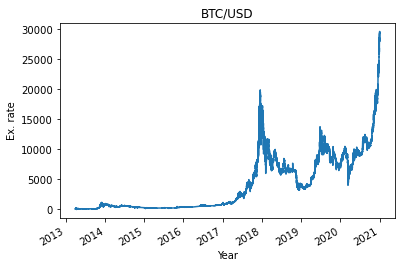

In [173]:
btc.close.plot()
plt.title('BTC/USD')
plt.xlabel('Year')
plt.ylabel('Ex. rate')
plt.show()

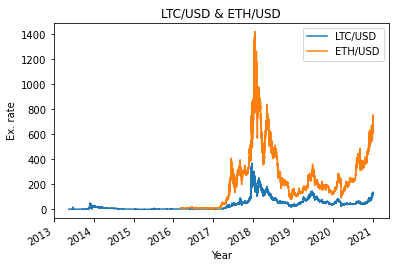

In [174]:
ltc.close.plot()
eth.close.plot()

plt.title('LTC/USD & ETH/USD')
plt.xlabel('Year')
plt.ylabel('Ex. rate')
plt.legend(['LTC/USD', 'ETH/USD'])
plt.show()
plt.show()

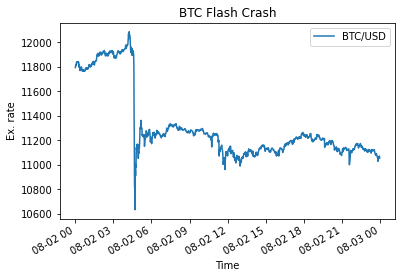

In [175]:
btc[btc.index.date == dt.date(2020,8,2)].close.plot()

plt.xlabel('Time')
plt.ylabel('Ex. rate')
plt.legend(['BTC/USD'])
plt.title('BTC Flash Crash')
plt.show()
plt.show()

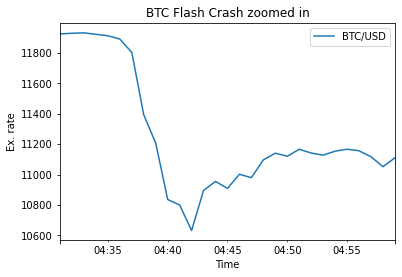

In [176]:
btc[(btc.index.date == dt.date(2020,8,2)) & (btc.index.time > dt.time(4,30)) & (btc.index.time < dt.time(5,0))].close.plot()

plt.xlabel('Time')
plt.ylabel('Ex. rate')
plt.legend(['BTC/USD'])
plt.title('BTC Flash Crash zoomed in')
plt.show()


In [107]:
# @dask.delayed
def label_data(data,
    timespan = 15, #minutes
    change = 0.05): #0.1 - 10% change

    crash = []

    for i in np.arange(sum(flashcrash.index <= flashcrash.index.max() - dt.timedelta(minutes = timespan))):

        if any(abs(flashcrash[(flashcrash.index < flashcrash.index[i] + dt.timedelta(minutes = timespan)) & (flashcrash.index >= flashcrash.index[i])].values.cumsum()) > change):
            crash.append(flashcrash.index[i])
    
    return crash

In [100]:
t0=time.time()
crash = label_data(flashcrash)
crashes = dask.compute(crash)
t1=time.time()
print('Runtime: %.2f s' %(t1-t0))

Runtime: 2853.33 s


In [140]:
crashes

([Timestamp('2020-03-12 10:13:00'),
  Timestamp('2020-03-12 10:14:00'),
  Timestamp('2020-03-12 10:15:00'),
  Timestamp('2020-03-12 10:16:00'),
  Timestamp('2020-03-12 10:17:00'),
  Timestamp('2020-03-12 10:18:00'),
  Timestamp('2020-03-12 10:19:00'),
  Timestamp('2020-03-12 10:20:00'),
  Timestamp('2020-03-12 10:21:00'),
  Timestamp('2020-03-12 10:22:00'),
  Timestamp('2020-03-12 10:23:00'),
  Timestamp('2020-03-12 10:24:00'),
  Timestamp('2020-03-12 10:25:00'),
  Timestamp('2020-03-12 10:26:00'),
  Timestamp('2020-03-12 10:27:00'),
  Timestamp('2020-03-12 10:28:00'),
  Timestamp('2020-03-12 10:29:00'),
  Timestamp('2020-03-12 10:30:00'),
  Timestamp('2020-03-12 10:31:00'),
  Timestamp('2020-03-12 10:32:00'),
  Timestamp('2020-03-12 10:33:00'),
  Timestamp('2020-03-12 10:34:00'),
  Timestamp('2020-03-12 10:35:00'),
  Timestamp('2020-03-12 10:36:00'),
  Timestamp('2020-03-12 10:37:00'),
  Timestamp('2020-03-12 10:38:00'),
  Timestamp('2020-03-12 10:39:00'),
  Timestamp('2020-03-12 10:4

In [115]:
t0=time.time()
flashcrash = np.log(btc[(btc.index.date >= dt.date(2020,1,1)) & (btc.index.date <= dt.date(2020,2,1))].close).diff()[1:]
crash = label_data(flashcrash, timespan = 15, change = 0.02)
t1=time.time()
print('Runtime: %.2f s' %(t1-t0))

Runtime: 24.42 s


In [139]:
np.squeeze(crash)

array([Timestamp('2020-01-02 16:34:00'), Timestamp('2020-01-02 16:35:00'),
       Timestamp('2020-01-02 16:36:00'), Timestamp('2020-01-02 16:37:00'),
       Timestamp('2020-01-02 16:38:00'), Timestamp('2020-01-02 16:39:00'),
       Timestamp('2020-01-02 16:40:00'), Timestamp('2020-01-02 16:41:00'),
       Timestamp('2020-01-02 16:42:00'), Timestamp('2020-01-02 16:43:00'),
       Timestamp('2020-01-02 16:44:00'), Timestamp('2020-01-02 16:45:00'),
       Timestamp('2020-01-02 16:46:00'), Timestamp('2020-01-02 16:47:00'),
       Timestamp('2020-01-03 04:14:00'), Timestamp('2020-01-03 04:15:00'),
       Timestamp('2020-01-03 04:16:00'), Timestamp('2020-01-03 04:17:00'),
       Timestamp('2020-01-03 04:18:00'), Timestamp('2020-01-03 04:19:00'),
       Timestamp('2020-01-03 04:20:00'), Timestamp('2020-01-03 04:21:00'),
       Timestamp('2020-01-03 04:22:00'), Timestamp('2020-01-03 04:23:00'),
       Timestamp('2020-01-03 04:24:00'), Timestamp('2020-01-03 04:25:00'),
       Timestamp('2020-01

In [96]:
def compute_R(events,tau_max=1000,dtau=1):
    taus=range(1,tau_max,dtau)
    events_mid_shifted=events["mid"]
    R=[]
    R_plus=[]
    R_minus=[]
    for tau in taus:
        events_mid_shifted=events_mid_shifted.shift(dtau)
        R.append(np.nanmean(-events["s"]*(events_mid_shifted-events["mid"])))  # - sign instead of shift(-dtau)
    return np.array(R)

In [ ]:
coarse_factor=5
events_06["dt"]=coarse_factor*((events_06.index.hour*60+events_06.index.minute)//coarse_factor)/60                            # chunks of 15 minutes
R_06_dt=events_06[["s","mid"]].groupby(events_06["dt"]).apply(compute_R,tau_max=10)
R_06_dt_plus=events_06[["s","mid"]][events_06["s"]>0].groupby(events_06["dt"]).apply(compute_R,tau_max=10)
R_06_dt_minus=events_06[["s","mid"]][events_06["s"]<0].groupby(events_06["dt"]).apply(compute_R,tau_max=10)

In [78]:
import pandas
from math import *
import math
import numpy as np

def std(list):
    element = 0 
    for item in list:
        element = element + float((item**2)/( len(list)))
    return math.sqrt(element)

def phi(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

def calx(v_i,delta_p_i,sigma):
    x = v_i * phi(delta_p_i/sigma)
    return x

In [84]:
df = btc

In [86]:
btc.head()

,time,open,close,high,low,volume,ticker
2013-04-01 00:07:00,1364774820000,93.25,93.30,93.30,93.25,93.300000,BTCUSD
2013-04-01 00:08:00,1364774880000,100.00,100.00,100.00,100.00,93.300000,BTCUSD
2013-04-01 00:09:00,1364774940000,93.30,93.30,93.30,93.30,33.676862,BTCUSD
2013-04-01 00:11:00,1364775060000,93.35,93.47,93.47,93.35,20.000000,BTCUSD
2013-04-01 00:12:00,1364775120000,93.47,93.47,93.47,93.47,2.021627,BTCUSD


In [91]:
df.index.dat

array([datetime.time(0, 7), datetime.time(0, 8), datetime.time(0, 9), ...,
       datetime.time(15, 7), datetime.time(15, 8), datetime.time(15, 9)],
      dtype=object)

In [93]:
high = df["high"].tolist()
low = df["low"].tolist()
vol = df["volume"].tolist()
date = df.index.date.tolist()
time = df.index.time.tolist()
sigma = np.std(df.close) #calculate standard deviation
totalvol = sum(vol)

In [95]:
dateset = tuple(set(date))
vpin=[]
for eachdate in dateset:
    dateslice = df[np.logical_not(df != eachdate)]
    datevol = dataslice['vol'].sum()
    vbs = datevol/50
    
    '''list to store results'''
    delta_p_i = []
    v_i = []
    x=[]
    
    '''convert slice to list'''
    highslice = dateslice["high"].tolist()
    lowslice = dateslice["low"].tolist()
    volslice = dateslice["vol"].tolist()
    
    '''generate basket'''
    highbas=[]
    lowbas=[]
    volbas=[]
    
    '''start filling basket'''
    for i in range(len(dateslice.index)):
        highbas.append(highslice[i])
        lowbas.append(lowslice[i])
        volbas.append(volslice[i])
        '''pop last element if vol exceeds.'''
        if sum(volbas) > vbs:
            v_i.append(sum(volbas[0:-1]))  
            delta_p_i.append(abs(max(highbas)-min(lowbas)))
            highbas = highbas[-1:] 
            lowbas = lowbas[-1:]
            volbas = volbas[-1:]
    for i in range(len(v_i)):
        x.append(calx(v_i[i],delta_p_i[i],sigma))
    v_tau_b=sum(x)
    dateitem= abs(2*v_tau_b - vbs)
    vpin.append(dateitem/totalvol)

KeyError: 'date'